In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Projectile Motion

If a particle is projected making an angle $\theta$ with the ground and with a velocity $v_0$, then, the trajectory of the projectile at any instant of time $t$ is given by
\begin{align}
&x = v_x * t \\
&y = v_y * t - \frac{1}{2} * g * t^2
\end{align}
where,
\begin{align}
&v_x = v_0 * \cos \theta \\
&v_x = v_0 * \sin \theta 
\end{align}
$g$ is the acceleration due to gravity.

## Algorithm: Trajectory of a Projectile Thrown at an Angle

#### Step 1: Define Input Parameters
1. Input:
   - Initial velocity (v0)
   - Angle of projection (θ)
   - Acceleration due to gravity (g)
   - Time interval for calculations

### Step 2: Compute Motion Components
2. Compute initial horizontal and vertical velocity components:
   - `vx = v0 * cos(θ)`
   - `vy = v0 * sin(θ)`

### Step 3: Compute Position Over Time
3. Iterate over time (t):
   - Compute horizontal position: `x = vx * t`
   - Compute vertical position: `y = vy * t - (1/2) * g * t^2`
   - Stop when `y < 0` (projectile hits the ground)

### Step 4: Display Results
4. Store the calculated positions.
5. Plot `y` vs `x` to visualize the projectile's trajectory.


 ```mermaid
    graph TD;
        A[Start] --> B[Define input parameters: v0, θ, g, time interval];
        B --> C[Compute vx = v0 * cos θ, vy = v0 * sinθ];
        C --> D[Initialize time t = 0];
        D --> E[Loop: While y >= 0];
        E --> F[Compute x = vx * t];
        F --> G[Compute y = vy * t - 1/2 * g * t^2];
        G --> H[Store x, y values];
        H --> I[Increment time t];
        I --> E;
        E -- No --> J[Plot trajectory y vs x];
        J --> K[End];
 

In [ ]:
#Input parameter

g = 10
u = 10
theta_deg = 20
theta_rad = np.radians(theta_deg)

# Discretizing 'time'
t = np.linspace(0, 10, 100)

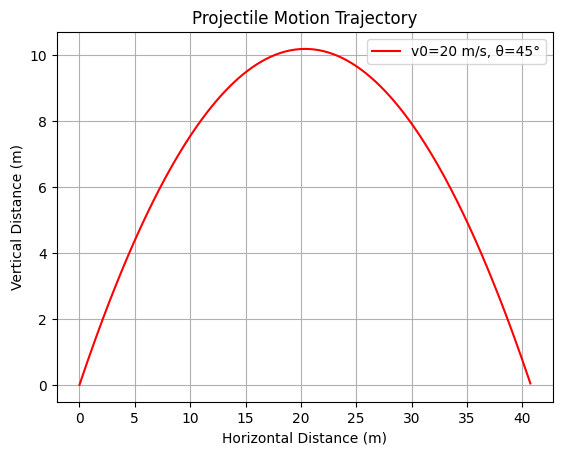

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute projectile motion
def projectile_motion(v0, theta, g=9.81, dt=0.01):
    theta_rad = np.radians(theta)  # Convert angle to radians
    vx = v0 * np.cos(theta_rad)  # Horizontal velocity
    vy = v0 * np.sin(theta_rad)  # Vertical velocity

    # Initialize lists to store trajectory points
    x, y = [0], [0]
    
    t = 0  # Start time
    while y[-1] >= 0:  # Run until projectile hits the ground
        t += dt
        x_new = vx * t
        y_new = vy * t - 0.5 * g * t**2
        if y_new < 0:  # Stop when projectile hits the ground
            break
        x.append(x_new)
        y.append(y_new)

    return x, y

# Inputs: Initial velocity and launch angle
v0 = 20  # Initial speed in m/s
theta = 45  # Launch angle in degrees

# Get trajectory points
x_vals, y_vals = projectile_motion(v0, theta)

# Plot the trajectory
plt.plot(x_vals, y_vals, 'r-', label=f"v0={v0} m/s, θ={theta}°")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Motion Trajectory")
plt.legend()
plt.grid()
plt.show()


# Algorithm for Projectile Motion (Vectorized Approach)

## **Step 1: Define Input Parameters**
- Take initial velocity $ v_0 $ (m/s).
- Take launch angle $ \theta $ (degrees).
- Define gravitational acceleration $ g = 9.81 $ m/s².
- Set a small time step $ dt $ for accurate calculations.

## **Step 2: Convert Angle to Radians**
- Compute $ \theta $ in radians using:  
  $$
  \theta_{\text{rad}} = \frac{\pi}{180} \times \theta
  $$

## **Step 3: Compute Initial Velocity Components**
- Horizontal velocity:  
  $$
  v_x = v_0 \cos(\theta_{\text{rad}})
  $$
- Vertical velocity:  
  $$
  v_y = v_0 \sin(\theta_{\text{rad}})
  $$

## **Step 4: Compute Time of Flight**
- Total time of flight:  
  $$
  t_{\text{flight}} = \frac{2 v_y}{g}
  $$
- Create a **NumPy time array** from 0 to $ t_{\text{flight}} $ with step $ dt $.

## **Step 5: Compute Position Using Vectorized Equations**
- Horizontal position for all time steps:  
  $$
  x = v_x \times t
  $$
- Vertical position for all time steps:  
  $$
  y = v_y \times t - \frac{1}{2} g t^2
  $$

## **Step 6: Plot the Trajectory**
- Use Matplotlib to plot $ x $ vs. $ y $.
- Label axes and add a title.
- Display the plot.

This approach ensures fast execution without loops by leveraging **NumPy's vectorized operations**. 🚀


```mermaid
graph TD;
    A[Start] --> B[Define Input Parameters: v0, angle, g, dt];
    B --> C[Convert angle to radians];
    C --> D[Compute Initial Velocity Components: vx, vy];
    D --> E[Compute Time of Flight: t_flight];
    E --> F[Create NumPy time array from 0 to t_flight];
    F --> G[Compute x positions: x = vx * t];
    G --> H[Compute y positions: y = vy * t - 0.5 * g * t^2];
    H --> I[Plot trajectory using Matplotlib];
    I --> J[Display the plot];
    J --> K[End];
```

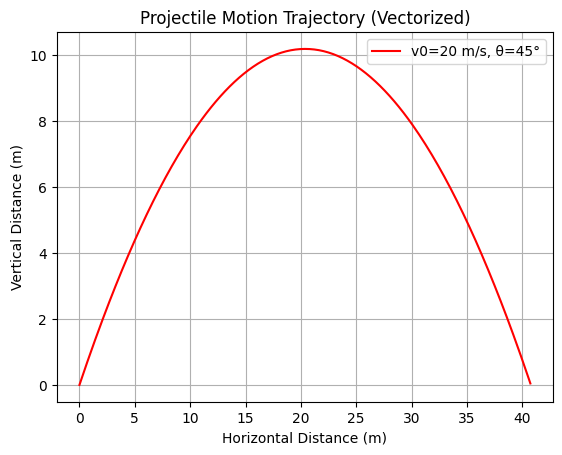

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute projectile motion using NumPy vectorization

def projectile_motion_vectorized(v0, theta, g=9.81, dt=0.01):
    theta_rad = np.radians(theta)  # Convert angle to radians
    vx = v0 * np.cos(theta_rad)  # Horizontal velocity component
    vy = v0 * np.sin(theta_rad)  # Vertical velocity component

    # Time of flight = (2 * vy) / g
    t_flight = (2 * vy) / g

    # Create time array from 0 to total flight time with step dt
    t = np.arange(0, t_flight, dt)

    # Compute x and y positions using vectorized operations
    x = vx * t
    y = vy * t - 0.5 * g * t**2

    return x, y

# Inputs: Initial velocity and launch angle
v0 = 20  # Initial speed in m/s
theta = 45  # Launch angle in degrees

# Compute trajectory using vectorized function
x_vals, y_vals = projectile_motion_vectorized(v0, theta)

# Plot the trajectory
plt.plot(x_vals, y_vals, 'r-', label=f"v0={v0} m/s, θ={theta}°")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Motion Trajectory (Vectorized)")
plt.legend()
plt.grid()
plt.show()
